In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.optimize import curve_fit
from uncertainties import *
from uncertainties import unumpy as unp
import  seaborn as sns
from scipy.odr import *
from scipy.constants import R
%matplotlib inline
sns.set()

In [96]:
def ex3(filename,sheetname):
    df=pd.read_excel(filename,sheet_name=sheetname)
    #creating uarray for the volume
    VTemp=np.array(df['Volume[ml]'])
    n=len(VTemp)
    VErTemp=[0.1]*n

    V=unp.uarray(VTemp,VErTemp)

    #creating uarray for the pressure

    pTemp=np.array(df['p[atm]'])
    pErTemp=[0.5]*n

    p=unp.uarray(pTemp,pErTemp)

    #preparing the arrays for plotting
    pV=p*V
    invV=1/V
    return pV,invV

In [94]:
df=pd.read_excel('ZUS.xlsx',sheet_name='A1_25.2grad')
#creating uarray for the volume
VTemp=np.array(df['Volume[ml]'])
n=len(VTemp)
VErTemp=[0.1]*n

V=unp.uarray(VTemp,VErTemp)

#creating uarray for the pressure

pTemp=np.array(df['p[atm]'])
pErTemp=[0.5]*n

p=unp.uarray(pTemp,pErTemp)

#preparing the arrays for plotting
pV=p*V
invV=1/V

# Uncertainties
p has an uncertainti of pm 0.5 atm
V has an uncertainty of 0.3 ml, this one is just decided by us becaus eof readout error

In [24]:
filenames=['ZUS.xlsx','Mappe1.xlsx']
sheetname=['A1_25.2grad','A1_39.9grad','A1_49.6grad','A1_32.6grad','A1_42.2grad','A1_54grad']

In [97]:
pV252,invV252=ex3(filenames[0],sheetname[0])
pV399,invV399=ex3(filenames[0],sheetname[1])
pV496,invV496=ex3(filenames[0],sheetname[2])
pV326,invV326=ex3(filenames[1],sheetname[3])
pV422,invV422=ex3(filenames[1],sheetname[4])
pV54,invV54=ex3(filenames[1],sheetname[5])

# Plotting pV vs 1/v
In red measurements from othe group, in blue ours.

Brauche in der aufgabe nur 2 messreihen...

In [148]:
def line(B,x):
    return B[0]*x + B[1]

Fitting with error bars

In [144]:
# Create a model for fitting.
fit_model = Model(line)

# Create a RealData object using our initiated data from above.
data = RealData(unp.nominal_values(invV399), unp.nominal_values(pV399), sx=unp.std_devs(invV399), sy=unp.std_devs(pV399)) 

# Set up ODR with the model and data.
odr = ODR(data, fit_model, beta0=[0.1,0.5])

# Run the regression.
out = odr.run()

B399=out.beta
B399err=out.sd_beta

In [147]:
# Create a model for fitting.
fit_model = Model(line)

# Create a RealData object using our initiated data from above.
data = RealData(unp.nominal_values(invV54), unp.nominal_values(pV54), sx=unp.std_devs(invV54), sy=unp.std_devs(pV54)) 

# Set up ODR with the model and data.
odr = ODR(data, fit_model, beta0=[0.1,0.5])

# Run the regression.
out = odr.run()


B54=out.beta
B54err=out.sd_beta

In [149]:
x=np.linspace(0,3,200)
y399=line(B399,x)
y54=line(B54,x)

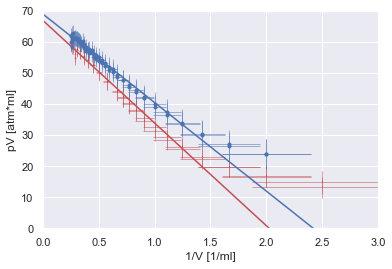

In [195]:
'''plt.errorbar(unp.nominal_values(invV252), unp.nominal_values(pV252),unp.std_devs(pV252),unp.std_devs(invV252),
             fmt='.',color='r',ecolor='r', elinewidth=0.5)'''
plt.errorbar(unp.nominal_values(invV399), unp.nominal_values(pV399),unp.std_devs(pV399),unp.std_devs(invV399),
             fmt=',',color='r',ecolor='r',elinewidth=0.5)
'''plt.errorbar(unp.nominal_values(invV496), unp.nominal_values(pV496),unp.std_devs(pV496),unp.std_devs(invV496),
             fmt='.',color='r',ecolor='r',elinewidth=0.5)'''
plt.plot(x,y399,color='r')
'''plt.errorbar(unp.nominal_values(invV326), unp.nominal_values(pV326),unp.std_devs(pV326),unp.std_devs(invV326),
             fmt='.',color='b',ecolor='b',elinewidth=0.5)
plt.errorbar(unp.nominal_values(invV422), unp.nominal_values(pV422),unp.std_devs(pV422),unp.std_devs(invV422),
             fmt=',',color='b',ecolor='b',elinewidth=0.5)'''
plt.errorbar(unp.nominal_values(invV54), unp.nominal_values(pV54),unp.std_devs(pV54),unp.std_devs(invV54),
             fmt='.',color='b',ecolor='b',elinewidth=0.5)
plt.plot(x,y54,color='b')
plt.xlabel('1/V [1/ml]')
plt.ylabel('pV [atm*ml]')
plt.xlim(0,3)
plt.ylim(0,70)
plt.savefig('ex3', dpi=1000,bbox_inches="tight")

In [152]:
print('The intercept with the y axis is ',B399[1], 'for T=39.9 and ',B54[1],' for T=54')

The intercept with the y axis is  66.89230991136047 for T=39.9 and  68.9523577544893  for T=54


pV=nRT

In [192]:
T399=39.9+273.15
T54=54+273.15
pV399extra=ufloat(B399[1],B399err[1])*101.324998/1e6 #from atm to kPa and from cm3 to m3
pV54extra=ufloat(B54[1],B54err[1])*101.324998/1e6

In [182]:
n399=pV399extra/(R*T399)
n54=pV54extra/(R*T54)

In [191]:
print('bei 39.9 is n =' ,n399)
print('bei 54 is n =' ,n54)

bei 39.9 is n = (2.604+/-0.022)e-06
bei 54 is n = (2.569+/-0.011)e-06


Calculating weighted average

In [190]:
entries=[unp.nominal_values(n399),unp.nominal_values(n54)]
weights=[1/(unp.std_devs(n399))**2,1/(unp.std_devs(n54))**2]
n=np.average(entries,weights=weights)

In [189]:
n

2.5750908749551942e-06

Should be e-3 not e-6. Number is correct otherwise

Error is 6/5 of smaller error, calculated on paper

In [194]:
6/5 * 0.011

0.013199999999999998